## This is a template for testing out the dynamics of a real-world networks under the budget condition

In [1]:
import sys
import os
sys.path.append('../../src')
import networkx as nx
import exp_env as env
import copy
import pickle

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
model_code_dir = os.path.join(parent_dir, 'src')
if model_code_dir not in sys.path:
    sys.path.append(model_code_dir)

# Load the graph from the file

# other networks:
# save_path = '../../network_data/facebook.gpickle'
save_path = '../../network_data/ca-GrQc.gpickle'
# save_path = '../../network_data/ca-GrQc.gpickle'

try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from ../../network_data/ca-GrQc.gpickle


In [3]:
model = env.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 461
Number of deinfluenced nodes: 0
Number of susceptible nodes: 4781
influencer {141, 12049, 19090, 25496, 2332, 22815, 11939, 22320, 15666, 13498, 5052, 450, 5829, 15941, 22727, 1356, 17235, 15585, 25975, 8185}


### Cascade Step = 3

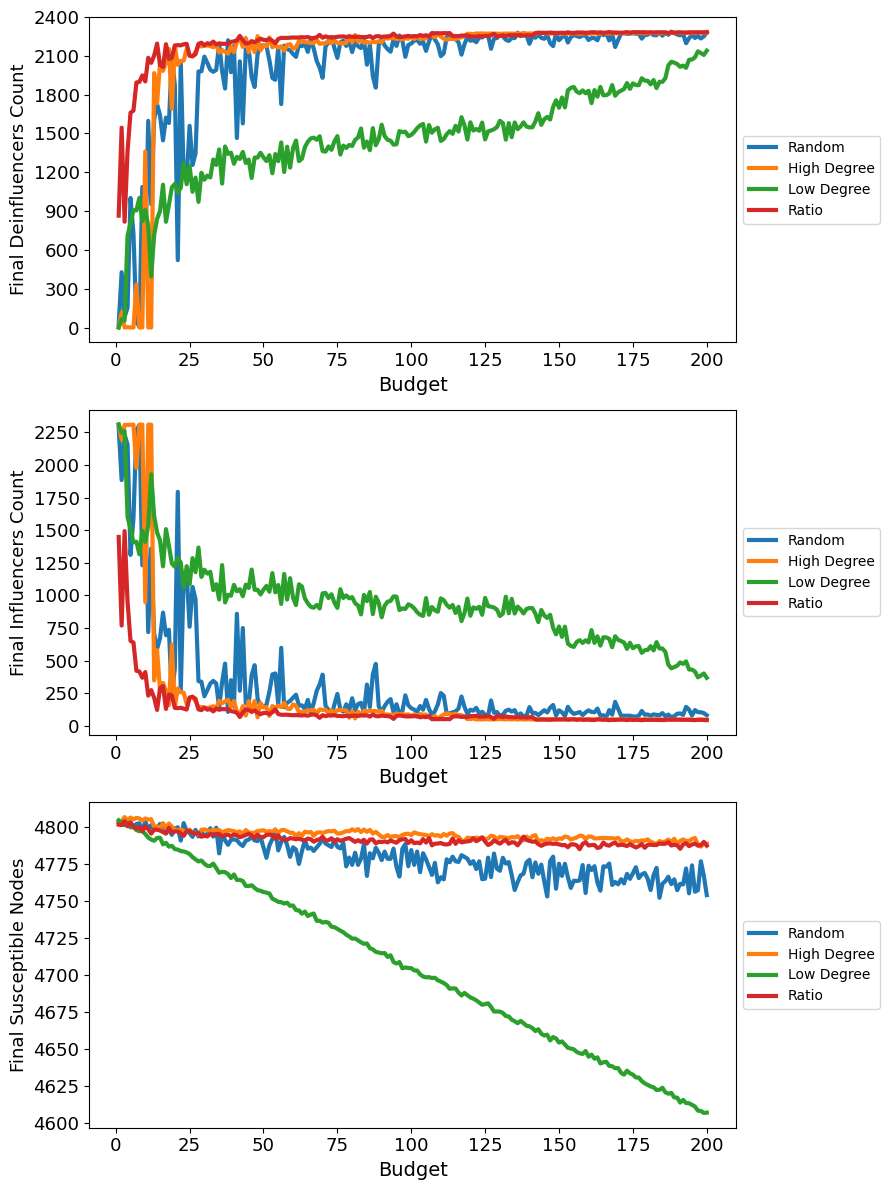

In [5]:
budget_list = list(range(1, 201))
deinfluencers_list = env.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = env.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)
env.plot_deinfluencer_results_exp2(results, G)